# EDA & Analysis – Vuadocau.com Products

**Phân tích 1189 sản phẩm từ Vuadocau.com**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
df = pd.read_excel("C:/Users/admin/Nhom-ACE32/data_processed/ketqua-final-craw (1).xlsx")

print(f"So san pham: {len(df)}")
print(f"Thoi gian phan tich: {datetime.now()}")
df.head()


So san pham: 1189
Thoi gian phan tich: 2025-12-26 01:12:35.448550


,name,size,price,color,rating_score,count_rate,sold_count,first_comment,short_description,product_url,image_url
0,Cần Câu Tay Guide Kỳ Lân Lửa Săn Hàng,3m6 | 4m5 | 5m4 | 6m3 | 7m2 | 8m1,1720000 | 2040000 | 2320000 | 2680000 | 304000...,NaN,5.00,3.0,70,Đoàn Văn Vinh Người đánh giá đã mua hàng,Cần câu tay Guide Kỳ Lân Lửa Săn Hàng sử dụng ...,https://vuadocau.com/can-cau-tay-guide-ky-lan-...,https://vuadocau.com/wp-content/uploads/2025/1...
1,Ná Thun Cao Su Thần Vương,NaN,275000,NaN,0.00,NaN,67,NaN,"Mẫu bắn cao su cao cấp bán chạy nhất hiện nay,...",https://vuadocau.com/na-thun-cao-su-than-vuong/,https://vuadocau.com/wp-content/uploads/2025/0...
2,Mồi Câu Lurefans E75,01ltd | 06 | 08 | 100 | 115ltd | 122 | 124ltd ...,210000 | 125000 | 125000 | 125000 | 210000 | 1...,129 | 126 | 124ltd | 122 | 115ltd | 100 | 08 |...,0.00,NaN,280,NaN,Mồi Câu Lurefans E75 đặc biệt hiệu quả với cá ...,https://vuadocau.com/moi-cau-lurefans-e75/,https://vuadocau.com/wp-content/uploads/2025/1...
3,"Mồi Câu Chẽm, Tráp, Chày Puma Minnow",a2 | a3 | a4 | a5 | mau-a6,75000 | 75000 | 75000 | 75000 | 75000,a5 | a4 | a3 | a2 | mau-a6,0.00,NaN,233,NaN,"Mồi Câu Chẽm, Tráp, Chày và các loại cá khác ở...",https://vuadocau.com/moi-cau-chem-trap-chay-pu...,https://vuadocau.com/wp-content/uploads/2025/1...
4,Cần Câu Lure Daiwa Salamandura,632mhb-1m9 | 702mhs-2m1 | 712mfs-2m16 | 722mhf...,3300000 | 3300000 | 3400000 | 3600000 | 350000...,NaN,4.75,4.0,157,Nguyễn Duy Kiên Người đánh giá đã mua hàng,Siêu phẩm cần lure giá tầm trung Salamandura đ...,https://vuadocau.com/can-cau-lure-daiwa-21-sal...,https://vuadocau.com/wp-content/uploads/2025/0...


## 1.Tổng quan dữ liệu


In [9]:
df.info()
df.shape
list(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1189 non-null   object 
 1   size               789 non-null    object 
 2   price              1189 non-null   object 
 3   color              259 non-null    object 
 4   rating_score       1189 non-null   float64
 5   count_rate         313 non-null    float64
 6   sold_count         1189 non-null   int64  
 7   first_comment      314 non-null    object 
 8   short_description  1188 non-null   object 
 9   product_url        1189 non-null   object 
 10  image_url          1168 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 102.3+ KB


['name',
 'size',
 'price',
 'color',
 'rating_score',
 'count_rate',
 'sold_count',
 'first_comment',
 'short_description',
 'product_url',
 'image_url']

## 2. Phân tích dữ liệu thiếu

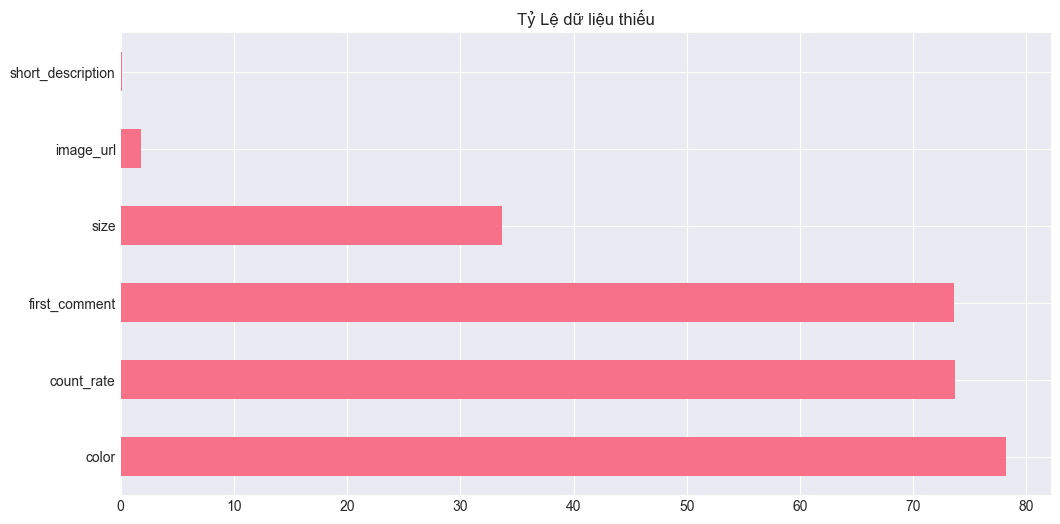

In [7]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "Missing": missing,
    "Percent (%)": missing_pct
}).query("Missing > 0").sort_values("Missing", ascending=False)

missing_df
if not missing_df.empty:
    missing_df["Percent (%)"].plot.barh()
    plt.title("Tỷ Lệ dữ liệu thiếu")
    plt.show()


## 3. Xử lý và đánh giá

In [10]:
def parse_first_price(price):
    if pd.isna(price):
        return np.nan
    try:
        return float(str(price).split("|")[0])
    except:
        return np.nan

df["price_first"] = df["price"].apply(parse_first_price)
df["price_first"].describe()


count    1.189000e+03
mean     1.152107e+06
std      2.504347e+06
min      4.000000e+03
25%      8.000000e+04
50%      1.950000e+05
75%      9.500000e+05
max      2.350000e+07
Name: price_first, dtype: float64

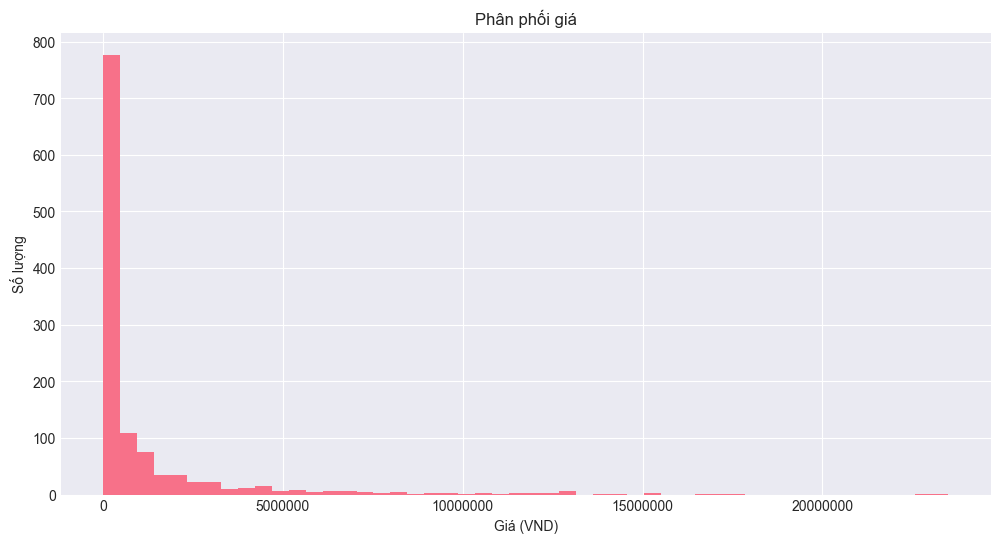

In [12]:
plt.hist(df["price_first"].dropna(), bins=50)
plt.xlabel("Giá (VND)")
plt.ylabel("Số lượng")
plt.title("Phân phối giá")
plt.ticklabel_format(style="plain", axis="x")
plt.show()


## 4. Phân khúc giá

In [13]:
def price_segment(p):
    if pd.isna(p): return "Unknown"
    if p < 100_000: return "Dưới 100K"
    if p < 500_000: return "100K–500K"
    if p < 1_000_000: return "500K–1M"
    if p < 2_000_000: return "1M–2M"
    if p < 5_000_000: return "2M–5M"
    return "Tren 5M"

df["price_segment"] = df["price_first"].apply(price_segment)
df["price_segment"].value_counts()


price_segment
Dưới 100K    393
100K–500K    392
500K–1M      114
1M–2M        110
2M–5M        107
Tren 5M       73
Name: count, dtype: int64

## 5. Chuẩn hoá dữ liệu "RATING"

In [17]:
# %%
df['rating_float'] = pd.to_numeric(df['rating_score'], errors='coerce')
df['count_rate_int'] = pd.to_numeric(df['count_rate'], errors='coerce')

rating_df = df[df['rating_float'].notna()]

print(f"So san pham co rating: {len(rating_df)} ({len(rating_df)/len(df)*100:.1f}%)")
rating_df[['rating_float', 'count_rate_int']].describe()


So san pham co rating: 1189 (100.0%)


,rating_float,count_rate_int
count,1189.000000,313.000000
mean,1.242254,3.955272
std,2.109628,3.038943
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,3.000000,5.000000
max,5.000000,19.000000


## 6. Phân bố Rating theo mức sao(Đánh giá theo sao)

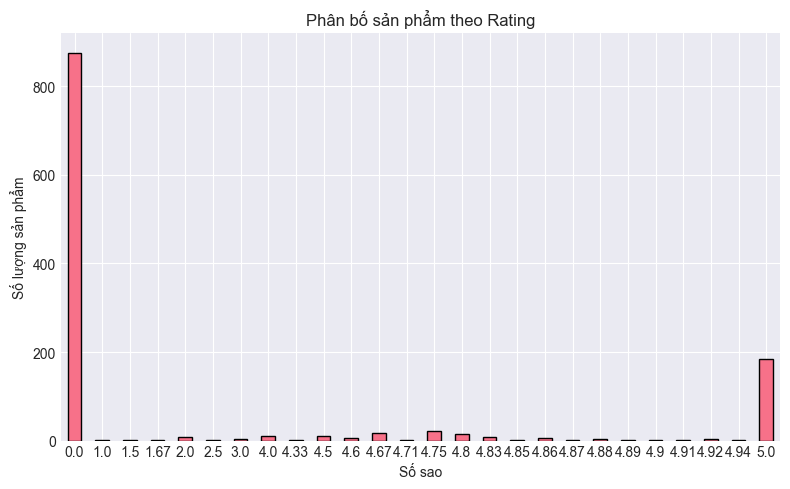

rating_float
0.00    876
1.00      2
1.50      1
1.67      1
2.00      9
2.50      1
3.00      4
4.00     10
4.33      1
4.50     10
4.60      5
4.67     16
4.71      2
4.75     21
4.80     15
4.83      9
4.85      1
4.86      5
4.87      1
4.88      3
4.89      2
4.90      2
4.91      2
4.92      4
4.94      1
5.00    185
Name: count, dtype: int64

In [19]:
# %%
rating_dist = rating_df['rating_float'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rating_dist.plot(kind='bar', edgecolor='black')
plt.xlabel('Số sao')
plt.ylabel('Số lượng sản phẩm')
plt.title('Phân bố sản phẩm theo Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

rating_dist


## 7. Top 10 sản phẩm bán chạy nhất

Số sản phẩm có dữ liệu bán hàng : 1189


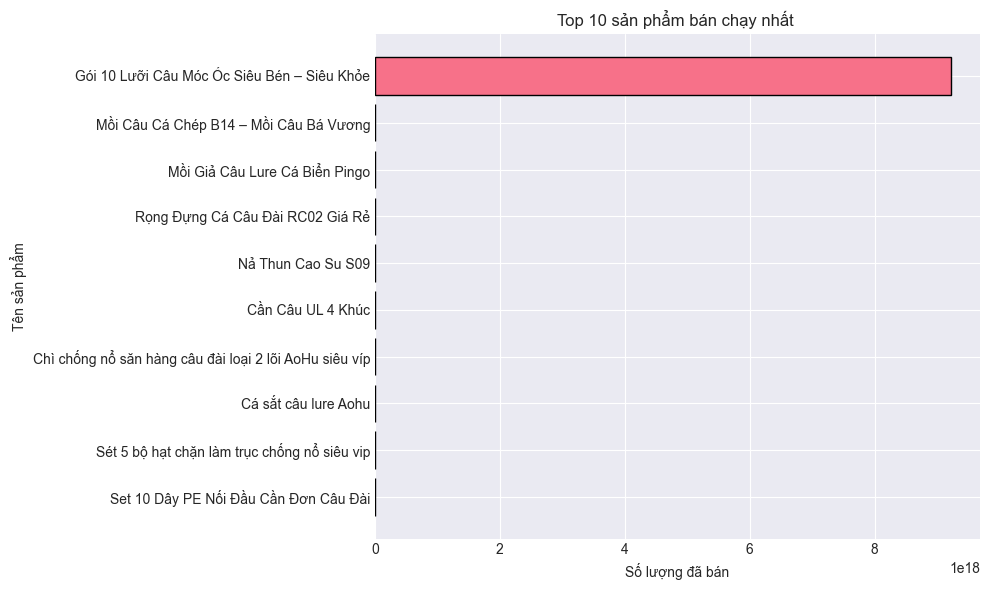

In [22]:
# %%
df['sold_count_int'] = pd.to_numeric(df['sold_count'], errors='coerce')

print(f"Số sản phẩm có dữ liệu bán hàng : {df['sold_count_int'].notna().sum()}")
# %%
top10_selling = df[df['sold_count_int'].notna()] \
    .sort_values('sold_count_int', ascending=False) \
    [['name', 'sold_count_int', 'price_first', 'rating_float']] \
    .head(10)

top10_selling
# %%
plt.figure(figsize=(10, 6))
plt.barh(
    top10_selling['name'],
    top10_selling['sold_count_int'],
    edgecolor='black'
)
plt.xlabel('Số lượng đã bán')
plt.ylabel('Tên sản phẩm')
plt.title('Top 10 sản phẩm bán chạy nhất ')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 8. Heatmap: Giá - Rating - Số lượng bán

In [32]:
# %%
heat_df = df[['price_first', 'rating_float', 'sold_count_int']].dropna()

print(f"Số mẫu dữ liệu dùng cho heatmap: {len(heat_df)}")


Số mẫu dữ liệu dùng cho heatmap: 1189


In [33]:

heat_df['price_bin'] = pd.qcut(
    heat_df['price_first'],
    q=5,
    duplicates='drop'
)

heat_df['rating_bin'] = pd.cut(
    heat_df['rating_float'],
    bins=[0, 3.5, 4.0, 4.5, 5.0],
    labels=['<3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
)

heat_df[['price_bin', 'rating_bin']].head()


,price_bin,rating_bin
0,"(1376000.0, 23500000.0]",4.5-5.0
1,"(130000.0, 314000.0]",NaN
2,"(130000.0, 314000.0]",NaN
3,"(70000.0, 130000.0]",NaN
4,"(1376000.0, 23500000.0]",4.5-5.0


In [34]:
# %%
heatmap_data = heat_df.pivot_table(
    values='sold_count_int',
    index='rating_bin',
    columns='price_bin',
    aggfunc='mean'
)

heatmap_data


price_bin,"(3999.999, 70000.0]","(70000.0, 130000.0]","(130000.0, 314000.0]","(314000.0, 1376000.0]","(1376000.0, 23500000.0]"
rating_bin,,,,,
<3.5,88.500000,188.200000,51.500000,94.000000,60.00000
3.5-4.0,NaN,158.000000,96.666667,255.500000,NaN
4.0-4.5,NaN,273.500000,NaN,109.666667,90.00000
4.5-5.0,529.714286,409.578947,177.208333,160.317647,77.76259


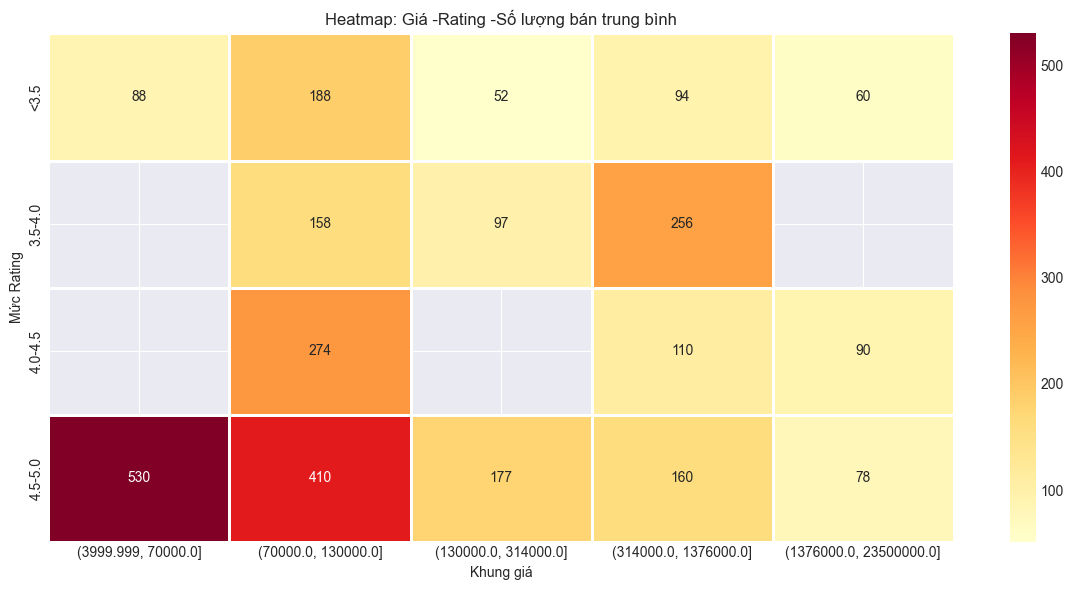

In [35]:
# %%
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    linewidths=1
)
plt.xlabel('Khung giá')
plt.ylabel('Mức Rating')
plt.title('Heatmap: Giá -Rating -Số lượng bán trung bình')
plt.tight_layout()
plt.show()


## 9. Top sản phẩm được đánh giá nhiều nhất

In [43]:

df['count_rate'] = pd.to_numeric(df['count_rate'], errors='coerce')

top5_most_rated = df[
    df['count_rate'].notna()
].sort_values(
    'count_rate',
    ascending=False
).head(5)[
    ['name', 'price', 'rating_score', 'count_rate', 'sold_count']
]

top5_most_rated


,name,price,rating_score,count_rate,sold_count
1076,Dây PE YGK X-Braid Upgrade X8,650000 | 650000 | 550000 | 550000 | 650000 | 6...,4.89,19.0,1135
634,Cần Câu Tay GW Quang Uy Chiến Tầm 6H,1350000 | 1650000 | 1950000 | 2250000,4.94,16.0,144
778,"Combo Cần Câu Câu Ngâm, Câu Lancer, Câu cá Tra...",800000 | 850000 | 800000 | 830000 | 750000,4.87,15.0,256
1111,Cần Tay Gama FX Vô Song,200000 | 460000 | 370000 | 480000 | 580000 | 7...,5.00,14.0,89
323,Cần Câu Tay GW Cạnh Kỹ Vương Lý 5H,2150000 | 2300000 | 2450000 | 2600000 | 304000...,5.00,14.0,153


## 10. Sản phẩm không có đánh giá và có lượt bán cao

In [42]:
# %%
df[
    df['first_comment'].isna() |
    (df['first_comment'].astype(str).str.strip() == '')
].sort_values(
    'sold_count',
    ascending=False
).head(1)[
    ['name', 'price', 'rating_score', 'sold_count']
]


,name,price,rating_score,sold_count
999,Gói 10 Lưỡi Câu Móc Ốc Siêu Bén – Siêu Khỏe,40000 | 40000 | 40000 | 40000 | 40000,0.0,9223372036854775807


### Giải thích :
 Phân tích cho thấy tồn tại sản phẩm không có comment
nhưng vẫn đạt số lượng bán rất cao. Sản phẩm này thường
có mức giá thấp đến trung bình và rating tương đối tốt, cho
thấy quyết định mua hàng của người dùng không hoàn toàn phụ
thuộc vào comment mà còn chịu ảnh hưởng bởi giá, mức độ phổ
biến và sự quen thuộc của sản phẩm.

## 11. Rating cao nhưng không bán chạy

In [41]:

high_rating_low_sales = df[
    (df['rating_score'].notna()) &
    (pd.to_numeric(df['rating_score'], errors='coerce') >= 4.5) &
    (pd.to_numeric(df['sold_count'], errors='coerce') <=
     pd.to_numeric(df['sold_count'], errors='coerce').quantile(0.25))
].copy()

# Chuyen kieu so
high_rating_low_sales['rating_score'] = pd.to_numeric(high_rating_low_sales['rating_score'], errors='coerce')
high_rating_low_sales['sold_count'] = pd.to_numeric(high_rating_low_sales['sold_count'], errors='coerce')
high_rating_low_sales['count_rate'] = pd.to_numeric(high_rating_low_sales['count_rate'], errors='coerce')

# Lay top 10 san pham ban it nhat
result = high_rating_low_sales.sort_values(
    'sold_count',
    ascending=True
).head(10)[
    ['name', 'price', 'rating_score', 'count_rate', 'sold_count']
]

result


,name,price,rating_score,count_rate,sold_count
847,Bột Câu Tơ Nhện Biệt Đội Săn Hàng,55000,5.0,3.0,0
1074,Daiwa 22 Exist LT (G),16800000 | 17100000,5.0,1.0,3
467,Daiwa Morethan Branzino EX AGS,15400000 | 15400000 | 16300000 | 16300000,5.0,1.0,8
244,Cần Câu Lure Shimano Bantam,7000000 | 7300000 | 7650000,5.0,2.0,12
684,Shimano 25 Stella SW,23500000 | 23500000 | 23500000,5.0,4.0,12
1134,Shimano 23 Antares DC MD,12800000 | 12800000 | 12800000 | 12800000,5.0,2.0,12
533,Shimano 21 Twin Power SW,11000000 | 12500000 | 12500000,5.0,2.0,12
208,Cân Câu Lure Daiwa Labrax AGS,7800000,5.0,1.0,13
206,Shimano World Shaula Dream Tour Edition 5 Khúc,13000000,5.0,2.0,13
408,Máy Câu Daiwa 21 Steez Limited SV TW,12000000,5.0,1.0,13


## Giải thích :
Một số sản phẩm có điểm đánh giá cao nhưng số lượt đánh giá (count_rate) thấp,
điều này cho thấy rating có thể chưa đủ độ tin cậy để ảnh hưởng đến quyết định mua hàng.